# Credit Card Fraud Detection

* This dataset contains 10,000 credit card transactions designed to support research and experimentation in fraud detection using machine learning. The data realistically simulates both legitimate and fraudulent transactions, while maintaining a naturally imbalanced class distribution, which reflects real-world financial systems.

* The dataset is suitable for binary classification tasks, where the objective is to predict whether a transaction is fraudulent (1) or legitimate (0) based on transaction behavior, risk indicators, and cardholder information.


* Dataset Characteristics

Total Records: 10,000

Total Features: 10

Target Variable: is_fraud

Class Distribution: Highly imbalanced (fraud ≈ 4–5%)

* Feature Description

Feature Name	--Description

transaction_id	--Unique identifier for each transaction

amount	--Transaction amount

transaction_hour	--Hour of transaction (0–23)

merchant_category	--Type of merchant

foreign_transaction	--Indicates if transaction is international (0/1)

location_mismatch	--Billing vs transaction location mismatch (0/1)

device_trust_score	--Trust score of the device (0–100)

velocity_last_24h	--Number of transactions in last 24 hours

cardholder_age	--Age of the cardholder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\creditcard fraud\credit_card_fraud_10k.csv")
df

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0


## EDA

In [3]:
df.size

100000

In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [6]:
df.columns

Index(['transaction_id', 'amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.0,5000.500000,2886.895680,1.0,2500.750,5000.500,7500.25,10000.00
amount,10000.0,175.949849,175.392827,0.0,50.905,122.095,242.48,1471.04
transaction_hour,10000.0,11.593300,6.922708,0.0,6.000,12.000,18.00,23.00
foreign_transaction,10000.0,0.097800,0.297059,0.0,0.000,0.000,0.00,1.00
location_mismatch,10000.0,0.085700,0.279935,0.0,0.000,0.000,0.00,1.00
device_trust_score,10000.0,61.798900,21.487053,25.0,43.000,62.000,80.00,99.00
velocity_last_24h,10000.0,2.008900,1.432559,0.0,1.000,2.000,3.00,9.00
cardholder_age,10000.0,43.468700,14.979147,18.0,30.000,44.000,56.00,69.00
is_fraud,10000.0,0.015100,0.121957,0.0,0.000,0.000,0.00,1.00


In [8]:
df.isna().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.drop(columns=['transaction_id','cardholder_age'])


In [11]:
df

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,is_fraud
0,84.47,22,Electronics,0,0,66,3,0
1,541.82,3,Travel,1,0,87,1,0
2,237.01,17,Grocery,0,0,49,1,0
3,164.33,4,Grocery,0,1,72,3,0
4,30.53,15,Food,0,0,79,0,0
...,...,...,...,...,...,...,...,...
9995,350.91,22,Food,0,0,99,4,0
9996,410.04,5,Clothing,0,0,70,3,0
9997,527.75,21,Electronics,0,0,44,2,0
9998,91.20,2,Electronics,0,0,38,0,0


In [12]:
df.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,is_fraud
0,84.47,22,Electronics,0,0,66,3,0
1,541.82,3,Travel,1,0,87,1,0
2,237.01,17,Grocery,0,0,49,1,0
3,164.33,4,Grocery,0,1,72,3,0
4,30.53,15,Food,0,0,79,0,0


In [13]:
df.tail()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,is_fraud
9995,350.91,22,Food,0,0,99,4,0
9996,410.04,5,Clothing,0,0,70,3,0
9997,527.75,21,Electronics,0,0,44,2,0
9998,91.20,2,Electronics,0,0,38,0,0
9999,44.06,2,Clothing,0,0,38,0,0


In [14]:
df['is_fraud'].value_counts()

is_fraud
0    9849
1     151
Name: count, dtype: int64

In [15]:
df['merchant_category'].value_counts()

merchant_category
Food           2093
Clothing       2050
Travel         1990
Grocery        1944
Electronics    1923
Name: count, dtype: int64

## Outliers

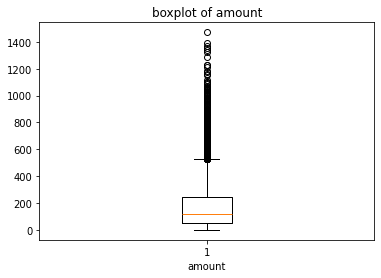

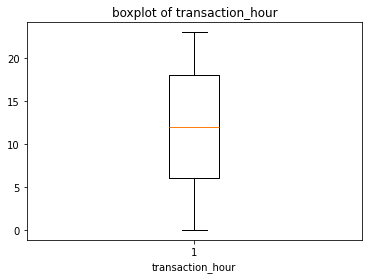

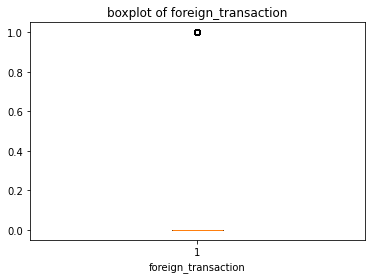

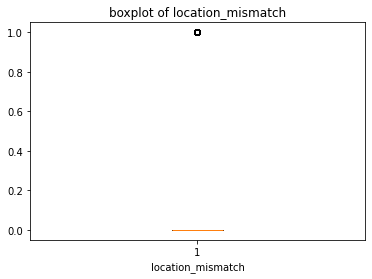

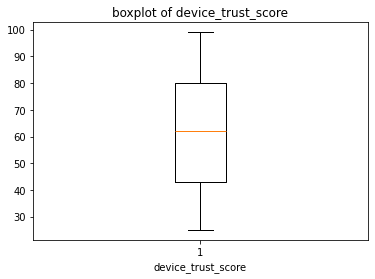

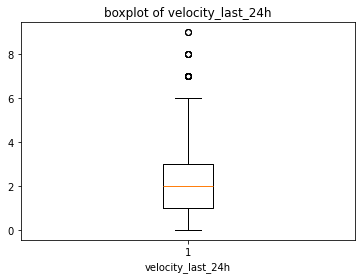

In [16]:
column_list=['amount', 'transaction_hour','foreign_transaction','location_mismatch', 'device_trust_score', 'velocity_last_24h']
for columns in column_list:
    plt.boxplot(df[columns])
    plt.title("boxplot of " + columns)
    plt.xlabel(columns)
    plt.show()

In [17]:
IQR=df["amount"].quantile(0.75)-df["amount"].quantile(0.25)
lower_bound=df["amount"].quantile(0.25)-(IQR*1.5)
upper_bound=df["amount"].quantile(0.75)+(IQR*1.5)
print(IQR)
print(lower_bound)
print(upper_bound)

191.575
-236.45749999999995
529.8425


In [18]:
outliers=np.where(df["amount"]<lower_bound,True,np.where(df["amount"]>upper_bound,True,False))
trimmed=df.loc[~(outliers)]

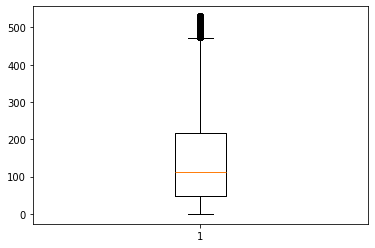

In [19]:
plt.boxplot(trimmed.amount)
plt.show()

In [20]:
IQR=df["foreign_transaction"].quantile(0.75)-df["foreign_transaction"].quantile(0.25)
lower_bound=df["foreign_transaction"].quantile(0.25)-(IQR*1.5)
upper_bound=df["foreign_transaction"].quantile(0.75)+(IQR*1.5)
print(IQR)
print(lower_bound)
print(upper_bound)

0.0
0.0
0.0


In [21]:
outliers=np.where(df["foreign_transaction"]<lower_bound,True,np.where(df["foreign_transaction"]>upper_bound,True,False))
trimmed=df.loc[~(outliers)]

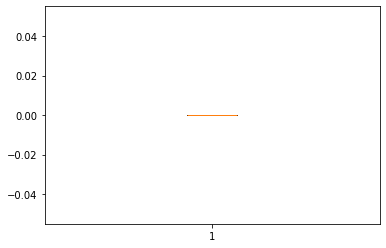

In [22]:
plt.boxplot(trimmed.foreign_transaction)
plt.show()

In [23]:
IQR=df["location_mismatch"].quantile(0.75)-df["location_mismatch"].quantile(0.25)
lower_bound=df["location_mismatch"].quantile(0.25)-(IQR*1.5)
upper_bound=df["location_mismatch"].quantile(0.75)+(IQR*1.5)
print(IQR)
print(lower_bound)
print(upper_bound)

0.0
0.0
0.0


In [24]:
outliers=np.where(df["location_mismatch"]<lower_bound,True,np.where(df["location_mismatch"]>upper_bound,True,False))
trimmed=df.loc[~(outliers)]

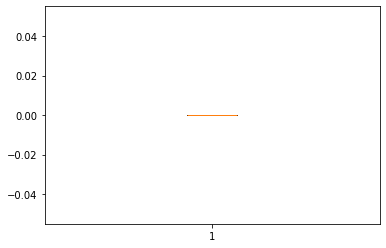

In [25]:
plt.boxplot(trimmed.location_mismatch)
plt.show()

In [26]:
IQR=df["velocity_last_24h"].quantile(0.75)-df["velocity_last_24h"].quantile(0.25)
lower_bound=df["velocity_last_24h"].quantile(0.25)-(IQR*1.5)
upper_bound=df["velocity_last_24h"].quantile(0.75)+(IQR*1.5)
print(IQR)
print(lower_bound)
print(upper_bound)

2.0
-2.0
6.0


In [27]:
outliers=np.where(df["velocity_last_24h"]<lower_bound,True,np.where(df["velocity_last_24h"]>upper_bound,True,False))
trimmed=df.loc[~(outliers)]

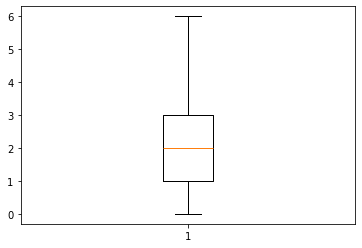

In [28]:
plt.boxplot(trimmed.velocity_last_24h)
plt.show()

## ENCODING

In [29]:
from sklearn.preprocessing import LabelEncoder
lbc=LabelEncoder()
df["merchant_category"]=lbc.fit_transform(df["merchant_category"]) #encode string into numerical
df

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,is_fraud
0,84.47,22,1,0,0,66,3,0
1,541.82,3,4,1,0,87,1,0
2,237.01,17,3,0,0,49,1,0
3,164.33,4,3,0,1,72,3,0
4,30.53,15,2,0,0,79,0,0
...,...,...,...,...,...,...,...,...
9995,350.91,22,2,0,0,99,4,0
9996,410.04,5,0,0,0,70,3,0
9997,527.75,21,1,0,0,44,2,0
9998,91.20,2,1,0,0,38,0,0


## Seperate X and y

In [30]:
X=df.drop(columns=['is_fraud'],axis=1)
X

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h
0,84.47,22,1,0,0,66,3
1,541.82,3,4,1,0,87,1
2,237.01,17,3,0,0,49,1
3,164.33,4,3,0,1,72,3
4,30.53,15,2,0,0,79,0
...,...,...,...,...,...,...,...
9995,350.91,22,2,0,0,99,4
9996,410.04,5,0,0,0,70,3
9997,527.75,21,1,0,0,44,2
9998,91.20,2,1,0,0,38,0


In [31]:
y=df['is_fraud']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: is_fraud, Length: 10000, dtype: int64

## Ploting

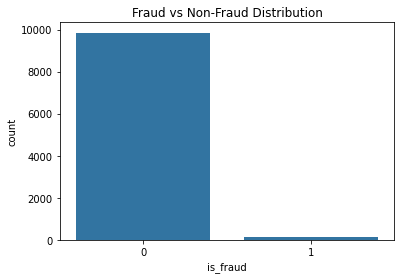

In [32]:
plt.figure()
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

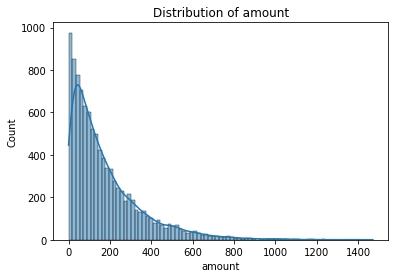

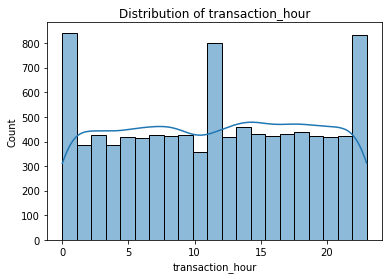

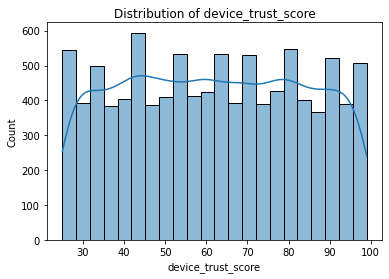

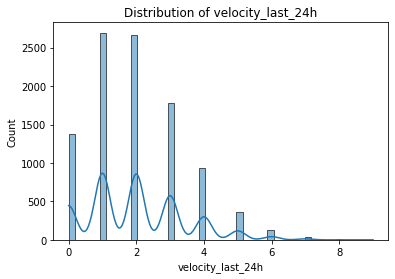

In [33]:
num_cols = [
    "amount", "transaction_hour", "device_trust_score",
    "velocity_last_24h"
]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
X_s=m.fit_transform(X)
X_s

array([[0.05742196, 0.95652174, 0.25      , ..., 0.        , 0.55405405,
        0.33333333],
       [0.36832445, 0.13043478, 1.        , ..., 0.        , 0.83783784,
        0.11111111],
       [0.1611173 , 0.73913043, 0.75      , ..., 0.        , 0.32432432,
        0.11111111],
       ...,
       [0.35875979, 0.91304348, 0.25      , ..., 0.        , 0.25675676,
        0.22222222],
       [0.06199695, 0.08695652, 0.25      , ..., 0.        , 0.17567568,
        0.        ],
       [0.0299516 , 0.08695652, 0.        , ..., 0.        , 0.17567568,
        0.        ]])

## Splitting the data for training and testing

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_s,y,test_size=0.3,random_state=1)

In [36]:
X_train.shape,X_test.shape

((7000, 7), (3000, 7))

In [37]:
y_train.shape,y_test.shape

((7000,), (3000,))

## Model creation using default parameter

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

k=KNeighborsClassifier(n_neighbors=5)
s=SVC (kernel='rbf')
g=GaussianNB()
d=DecisionTreeClassifier(criterion='entropy') 
r=RandomForestClassifier(random_state=1)
a=AdaBoostClassifier()
xgb=XGBClassifier()
gr=GradientBoostingClassifier()
lists=[]
l=[k,s,g,d,r,a,xgb,gr]
for i in l:
    print(i)
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    lists.append(accuracy_score(y_test, y_pred)*100)
    print(accuracy_score(y_test,y_pred)*100) 

KNeighborsClassifier()
98.86666666666667
SVC()
98.9
GaussianNB()
97.83333333333334
DecisionTreeClassifier(criterion='entropy')
99.96666666666667
RandomForestClassifier(random_state=1)
99.66666666666667
AdaBoostClassifier()
99.96666666666667
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
9

In [39]:
data=pd.DataFrame(lists,index=['KNN','SVC','NB','DECISIONTREE','RANDOMFOREST','ADABOOST','XGBOOST','GRADIENTBOOST'],columns=['default parameters'])
data

,default parameters
KNN,98.866667
SVC,98.900000
NB,97.833333
DECISIONTREE,99.966667
RANDOMFOREST,99.666667
ADABOOST,99.966667
XGBOOST,99.933333
GRADIENTBOOST,99.933333


## FEATURE SELECTION

In [40]:
df.corr()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,is_fraud
amount,1.000000,-0.007369,-0.003426,0.004094,0.004232,0.009698,-0.001133,0.028404
transaction_hour,-0.007369,1.000000,-0.008098,-0.000255,0.004776,0.004054,-0.003709,-0.138665
merchant_category,-0.003426,-0.008098,1.000000,0.003493,0.004161,0.006361,-0.010217,0.015353
foreign_transaction,0.004094,-0.000255,0.003493,1.000000,0.001426,0.012780,-0.007686,0.185597
location_mismatch,0.004232,0.004776,0.004161,0.001426,1.000000,0.002217,-0.005892,0.173009
device_trust_score,0.009698,0.004054,0.006361,0.012780,0.002217,1.000000,-0.000095,-0.137913
velocity_last_24h,-0.001133,-0.003709,-0.010217,-0.007686,-0.005892,-0.000095,1.000000,0.103413
is_fraud,0.028404,-0.138665,0.015353,0.185597,0.173009,-0.137913,0.103413,1.000000


## DEPLOY MODEL

here the best algorithm id DECISIONTREE and ADABOOST with default parameters.it gives 99.966667% accuracy. so we select the model for water potablilty is ADABOOST

In [41]:
#sklearn.ensemble.AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      0.98      0.99        50

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



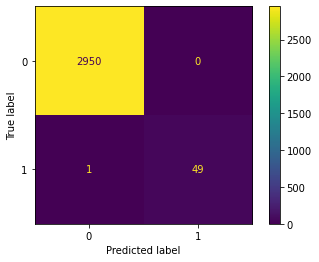

In [42]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

# Evaluation on Testing Data
y_pred_a=ada_clf.predict(X_test)
confusion_matrix(y_test, ada_clf.predict(X_test))
accuracy_score(y_test, ada_clf.predict(X_test))

# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(X_train))

print(classification_report(y_test,y_pred_a))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_a))


In [43]:
# auc scores
auc_score=roc_auc_score(y_test,y_pred_a)
print(auc_score)

0.99


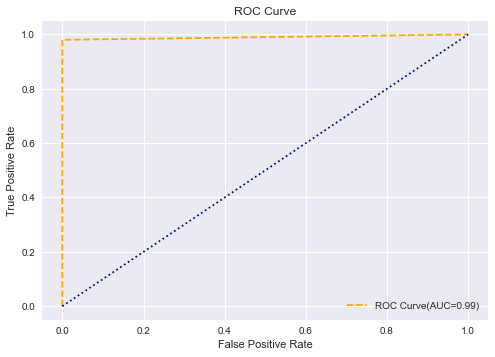

In [44]:
# roc curve for model
fpr,tpr,thresh=roc_curve(y_test,y_pred_a)
#plot roc curve
plt.style.use('seaborn-v0_8')
plt.plot(fpr,tpr,linestyle='--',color='orange',label='ROC Curve(AUC=%0.2f)'% auc_score)
plt.plot([0,1],[0,1],color='navy',linestyle=':')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show();

In [45]:
import pickle
pickle.dump(ada_clf,open('credit','wb'))
pickle.dump(m,open('scaler','wb'))
pickle.dump(lbc,open('encode','wb'))